In [1]:
import pandas as pd 
import numpy as np
import netCDF4
import xarray as xr 
import matplotlib.pyplot as plt

In [16]:
#In Salah region_________Import data
sol1 = xr.open_dataset('ERA5-Sahara_sol+wind100_2007-2010.nc')  #2007-01-01T00:00:00   to   2010-12-31T23:00:00
sol2 = xr.open_dataset('ERA5-Sahara_sol+wind100_2011-2014.nc')  #2011-01-01T00:00:00   to   2014-12-31T23:00:00
sol3 = xr.open_dataset('ERA5-Sahara_sol+wind100_2015-2018.nc')  #2018-12-31T22:00:00   to   2018-12-31T23:00:00

In [17]:
#merge three datasets
wos = xr.merge([sol1, sol2, sol3])

In [18]:
s0 = wos.ssrd
w0 = np.sqrt(np.square(wos.u100)+np.square(wos.v100))

In [19]:
wc8 = w0.sel(longitude=2.25 , latitude=25.5 ,time=slice('2007-01-01T00:00:00','2018-09-30T23:00:00')) #min pearson solar_vs_wind
wc9 = w0.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2007-01-01T00:00:00','2018-09-30T23:00:00')) #max pearson solar_vs_wind

In [20]:
sc8 = s0.sel(longitude=2.25 , latitude=25.5 ,time=slice('2007-01-01T00:00:00','2018-09-30T23:00:00')) #min pearson solar_vs_wind
sc9 = s0.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2007-01-01T00:00:00','2018-09-30T23:00:00')) #max pearson solar_vs_wind

## Daily climate mean (Capacity Factor)

In [2]:
#power curves:
#--------------
sci = 2.5
sx = 10.
sco = 25.
a0 = 0.935
alpha = 2.14
a1 = 100.
a2 = 9.16
beta = 1.05
def capacity_factor(s):
    if ((s < sci) or (s > sco)): 
        p = 0.0
    elif (s >= sci and s <= sx):
        p = a0*np.power((s-sci),alpha)
    elif (s > sx and s <= sco):
        p = a1/(1+np.exp(-np.power(s-a2,beta))) 
    return p
#-------------------------------------------------------------------------------------


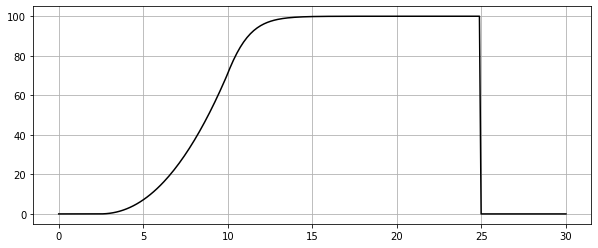

In [15]:
plt.figure(figsize = (10,4))
new_x=0
#print(new_x)
new_y = np.zeros(300)
for i in range(0,300):
    new_x=new_x + 30/300
    new_y[i]=capacity_factor(new_x)
new_x=np.linspace(0, 30, 300)    
new_y    
plt.grid()
plt.plot(new_x,new_y, color='black')

In [ ]:
#Wind Capacity Fcator at selected geographic grid point

ww8 = np.zeros((32856))
ww9 = np.zeros((32856))


for i in range(0,32856):
    ww8[i] = capacity_factor(wc8[i])  
for i in range(0,32856):
    ww9[i] = capacity_factor(wc9[i])  

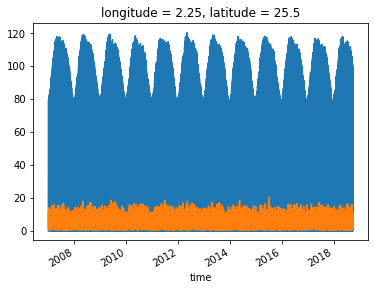

In [21]:
sw8 = 0.1 * 1.125 * sc8/3600
sw9 = 0.1 * 1.125 * sc9/3600
sw8.plot()
wc8.plot()

In [22]:
#Wind Capacity Fcator at selected geographic grid point

ww8 = np.zeros((102984))
ww9 = np.zeros((102984))


for i in range(0,102984):
    ww8[i] = capacity_factor(wc8[i])  
for i in range(0,102984):
    ww9[i] = capacity_factor(wc9[i])  

In [23]:
ww9.size

102984

In [24]:
#seasons index
swwc = sc8['time.season']
sswc = np.zeros((102984)) 

b = 'DJF'
c = 'MAM'
d = 'JJA'
e = 'SON'

for i in range(0,102984):
    a = swwc.values[i]
    if a == b:
        sswc[i] = 1
    elif a == c:
        sswc[i] = 2
    elif a == d:
        sswc[i] = 3
    elif a == e:
        sswc[i] = 4

In [25]:
#SOLAR ENERGY IN FOUR SEASONS_8
#WIND ENERGY IN FOUR SEASONS_8

#Data in season  
#/---------------Hourly mean wind speed in each season

nsw8 = np.array(sw8) #solar data
hsw8 = (np.array(sw8['time.hour'])) 
ssw8 = np.array(sswc)  #season new index for wind and solar data in 4 years

nww8 = np.array(ww8) #the only difference is in the output data



wind_ratio = [hsw8, ssw8, nww8]  #hour, season_index, wind_data
wind_ratio_8 = pd.DataFrame(wind_ratio).T
wind_ratio_8[3]=wind_ratio_8[0]*wind_ratio_8[1]

solar_ratio = [hsw8, ssw8, nsw8]  #hour, season_index, solar_data
solar_ratio_8 = pd.DataFrame(solar_ratio).T
solar_ratio_8[3]=solar_ratio_8[0]*solar_ratio_8[1]

In [26]:
wind_ratio_8

,0,1,2,3
0,0.0,1.0,81.948298,0.0
1,1.0,1.0,80.478849,1.0
2,2.0,1.0,76.889149,2.0
3,3.0,1.0,65.589106,3.0
4,4.0,1.0,50.644089,4.0
...,...,...,...,...
102979,19.0,4.0,17.033809,76.0
102980,20.0,4.0,16.501318,80.0
102981,21.0,4.0,20.940525,84.0
102982,22.0,4.0,48.948493,88.0


In [27]:
#WIND SEASON SEPARATION
w_DJF = np.zeros((2,25248))  #..................
w_JJA = np.zeros((2,26496))
w_MAM = np.zeros((2,26496))
w_SON = np.zeros((2,24744))   #..............
i = 0
j = 0
k = 0
q = 0
m = 0

for i in range(0,102984):
    h = wind_ratio_8[0][i]   #hour index
    s = wind_ratio_8[1][i]  #season index
    if s == 1:
        
        w_DJF[0][j] = h
        w_DJF[1][j] = wind_ratio_8[2][i]
        j = j+1
    
    elif s == 2:
                   
        
        w_MAM[0][q] = h
        w_MAM[1][q] = wind_ratio_8[2][i]
        q = q+1
        
    elif s == 3:
                 
        
        w_JJA[0][k] = h
        w_JJA[1][k] = wind_ratio_8[2][i]
        k = k+1
                
    elif s == 4:
        
        w_SON[0][m] = h
        w_SON[1][m] = wind_ratio_8[2][i]
        m = m+1

In [28]:
#SOLAR SEASON SEPARATION
s_DJF = np.zeros((2,25248))  #..................
s_JJA = np.zeros((2,26496))
s_MAM = np.zeros((2,26496))
s_SON = np.zeros((2,24744))   #..............
i = 0
j = 0
k = 0
q = 0
m = 0

for i in range(0,102984):
    h = solar_ratio_8[0][i]   #hour index
    s = solar_ratio_8[1][i]  #season index
    
    if s == 1:
        
        s_DJF[0][j] = h
        s_DJF[1][j] = solar_ratio_8[2][i]
        j = j+1
              
    elif s == 2:
                   
        
        s_MAM[0][q] = h
        s_MAM[1][q] = solar_ratio_8[2][i]
        q = q+1
        
    elif s == 3:      
            
        
        s_JJA[0][k] = h
        s_JJA[1][k] = solar_ratio_8[2][i]
        k = k+1
        
    elif s == 4:
        
        s_SON[0][m] = h
        s_SON[1][m] = solar_ratio_8[2][i]
        m = m+1
        

In [29]:
#SOLAR_MEAN_STD
DJF1 = np.array(s_DJF).T
JJA1 = np.array(s_JJA).T
MAM1 = np.array(s_MAM).T
SON1 = np.array(s_SON).T
DJF2 = pd.DataFrame(DJF1)
JJA2 = pd.DataFrame(JJA1)
MAM2 = pd.DataFrame(MAM1)
SON2 = pd.DataFrame(SON1)
s_DJF_mean = DJF2.groupby([0])[1].mean()
s_JJA_mean = JJA2.groupby([0])[1].mean()
s_MAM_mean = MAM2.groupby([0])[1].mean()
s_SON_mean = SON2.groupby([0])[1].mean()

s_DJF_std = DJF2.groupby([0])[1].std()
s_JJA_std = JJA2.groupby([0])[1].std()
s_MAM_std = MAM2.groupby([0])[1].std()
s_SON_std = SON2.groupby([0])[1].std()
s_MAM_mean

0
0.0      -0.000033
1.0      -0.000033
2.0      -0.000033
3.0      -0.000033
4.0      -0.000033
5.0      -0.000033
6.0       1.927119
7.0      15.822140
8.0      39.833573
9.0      64.624697
10.0     85.640184
11.0    100.601831
12.0    107.662083
13.0    106.299203
14.0     96.843499
15.0     79.984402
16.0     57.760864
17.0     32.883884
18.0     10.293489
19.0      0.369411
20.0     -0.000033
21.0     -0.000033
22.0     -0.000033
23.0     -0.000033
Name: 1, dtype: float64

In [30]:
#WIND_MEAN_STD
DJF1 = np.array(w_DJF).T
JJA1 = np.array(w_JJA).T
MAM1 = np.array(w_MAM).T
SON1 = np.array(w_SON).T
DJF2 = pd.DataFrame(DJF1)
JJA2 = pd.DataFrame(JJA1)
MAM2 = pd.DataFrame(MAM1)
SON2 = pd.DataFrame(SON1)
w_DJF_mean = DJF2.groupby([0])[1].mean()
w_JJA_mean = JJA2.groupby([0])[1].mean()
w_MAM_mean = MAM2.groupby([0])[1].mean()
w_SON_mean = SON2.groupby([0])[1].mean()

w_DJF_std = DJF2.groupby([0])[1].std()
w_JJA_std = JJA2.groupby([0])[1].std()
w_MAM_std = MAM2.groupby([0])[1].std()
w_SON_std = SON2.groupby([0])[1].std()
w_JJA_mean

0
0.0     53.163781
1.0     53.616381
2.0     52.542199
3.0     50.333679
4.0     47.403386
5.0     44.176596
6.0     40.919547
7.0     34.293762
8.0     24.456059
9.0     25.023609
10.0    24.016494
11.0    20.811954
12.0    16.821842
13.0    14.267275
14.0    13.675350
15.0    14.549853
16.0    16.251172
17.0    18.593866
18.0    21.810110
19.0    27.066198
20.0    35.322083
21.0    42.970838
22.0    47.994235
23.0    50.912466
Name: 1, dtype: float64

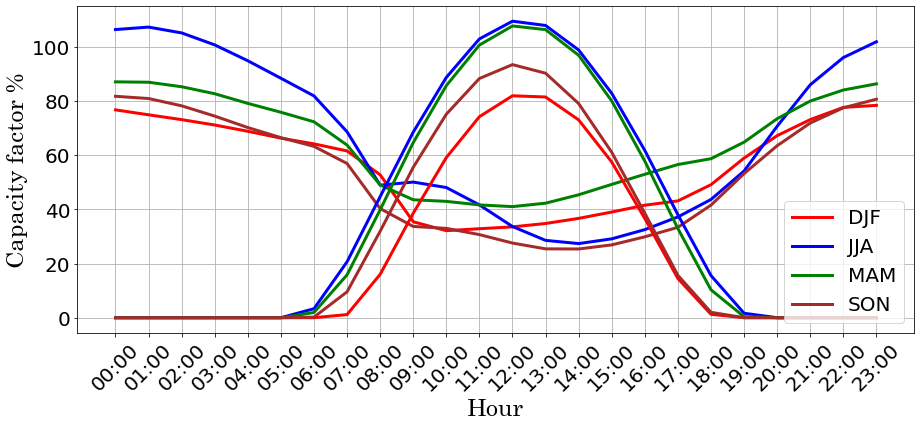

In [31]:
plt.figure(figsize = (15,6))

g = pd.date_range('1/1/2011', periods=24, freq='H')   #ceate one day time range
 
plt.plot(g.strftime("%H:00"), w_DJF_mean*2, label='DJF', color='red',  linewidth=3)
plt.plot(g.strftime("%H:00"), w_JJA_mean*2, label='JJA', color='blue',  linewidth=3)
plt.plot(g.strftime("%H:00"), w_MAM_mean*2, label='MAM', color='green',  linewidth=3)
plt.plot(g.strftime("%H:00"), w_SON_mean*2, label='SON',color='brown',  linewidth=3)

plt.plot(g.strftime("%H:00"), s_DJF_mean, color='red',  linewidth=3)
plt.plot(g.strftime("%H:00"), s_JJA_mean, color='blue',  linewidth=3)
plt.plot(g.strftime("%H:00"), s_MAM_mean, color='green',  linewidth=3)
plt.plot(g.strftime("%H:00"), s_SON_mean, color='brown',  linewidth=3)
plt.xticks(rotation=45);

#plt.plot(g.strftime("%H:00"), w_DJF_mean*15 + s_DJF_mean, color='red',  linewidth=3)
#plt.plot(g.strftime("%H:00"), w_JJA_mean*15 + s_JJA_mean, color='blue',  linewidth=3)
#plt.plot(g.strftime("%H:00"), w_MAM_mean*10 + s_MAM_mean, color='green',  linewidth=3)
#plt.plot(g.strftime("%H:00"), w_SON_mean*16 + s_SON_mean, color='brown',  linewidth=3)

#plt.fill_between(DJF_mean.index, DJF_mean - DJF_std, DJF_mean + DJF_std, label='standard deviation', color='red', alpha=0.05)
#plt.fill_between(JJA_mean.index, JJA_mean - JJA_std, DJF_mean + JJA_std, label='standard deviation', color='blue', alpha=0.05)
#plt.fill_between(MAM_mean.index, MAM_mean - DJF_std, MAM_mean + MAM_std, label='standard deviation', color='green', alpha=0.05)
#plt.fill_between(SON_mean.index, SON_mean - SON_std, DJF_mean + SON_std, label='standard deviation', color='yellow', alpha=0.05)
#plt.ylim(0, 12)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Hour',fontname='Century',fontsize=24, color='black')
plt.ylabel('Capacity factor %',fontname='Century', fontsize=24, color='black')
plt.legend(fontsize=20, loc='lower right')


In [32]:
#SOLAR ENERGY IN FOUR SEASONS_9
#WIND ENERGY IN FOUR SEASONS_9

#Data in season  
#/---------------Hourly mean wind speed in each season

nsw9 = np.array(sw9) #solar data
hsw9 = (np.array(sw9['time.hour'])) 
ssw9 = np.array(sswc)  #season new index for wind and solar data in 4 years

nww9 = np.array(ww9) #the only difference is in the output data



wind_ratio = [hsw9, ssw9, nww9]  #hour, season_index, wind_data
wind_ratio_9 = pd.DataFrame(wind_ratio).T
wind_ratio_9[3]=wind_ratio_9[0]*wind_ratio_9[1]

solar_ratio = [hsw9, ssw9, nsw9]  #hour, season_index, solar_data
solar_ratio_9 = pd.DataFrame(solar_ratio).T
solar_ratio_9[3]=solar_ratio_9[0]*solar_ratio_9[1]

In [33]:
#WIND SEASON SEPARATION
w_DJF = np.zeros((2,25248))  #..................
w_JJA = np.zeros((2,26496))
w_MAM = np.zeros((2,26496))
w_SON = np.zeros((2,24744))   #..............
i = 0
j = 0
k = 0
q = 0
m = 0

for i in range(0,102984):
    h = wind_ratio_8[0][i]   #hour index
    s = wind_ratio_8[1][i]  #season index
    if s == 1:
        
        w_DJF[0][j] = h
        w_DJF[1][j] = wind_ratio_9[2][i]
        j = j+1
    
    elif s == 2:
                   
        
        w_MAM[0][q] = h
        w_MAM[1][q] = wind_ratio_9[2][i]
        q = q+1
        
    elif s == 3:
                 
        
        w_JJA[0][k] = h
        w_JJA[1][k] = wind_ratio_9[2][i]
        k = k+1
                
    elif s == 4:
        
        w_SON[0][m] = h
        w_SON[1][m] = wind_ratio_9[2][i]
        m = m+1

In [34]:
#SOLAR SEASON SEPARATION
s_DJF = np.zeros((2,25248))  #..................
s_JJA = np.zeros((2,26496))
s_MAM = np.zeros((2,26496))
s_SON = np.zeros((2,24744))   #..............
i = 0
j = 0
k = 0
q = 0
m = 0

for i in range(0,102984):
    h = solar_ratio_9[0][i]   #hour index
    s = solar_ratio_9[1][i]  #season index
    
    if s == 1:
        
        s_DJF[0][j] = h
        s_DJF[1][j] = solar_ratio_9[2][i]
        j = j+1
              
    elif s == 2:
                   
        
        s_MAM[0][q] = h
        s_MAM[1][q] = solar_ratio_9[2][i]
        q = q+1
        
    elif s == 3:      
            
        
        s_JJA[0][k] = h
        s_JJA[1][k] = solar_ratio_9[2][i]
        k = k+1
        
    elif s == 4:
        
        s_SON[0][m] = h
        s_SON[1][m] = solar_ratio_9[2][i]
        m = m+1
        

In [35]:
#SOLAR_MEAN_STD
DJF1 = np.array(s_DJF).T
JJA1 = np.array(s_JJA).T
MAM1 = np.array(s_MAM).T
SON1 = np.array(s_SON).T
DJF2 = pd.DataFrame(DJF1)
JJA2 = pd.DataFrame(JJA1)
MAM2 = pd.DataFrame(MAM1)
SON2 = pd.DataFrame(SON1)
s_DJF_mean = DJF2.groupby([0])[1].mean()
s_JJA_mean = JJA2.groupby([0])[1].mean()
s_MAM_mean = MAM2.groupby([0])[1].mean()
s_SON_mean = SON2.groupby([0])[1].mean()

s_DJF_std = DJF2.groupby([0])[1].std()
s_JJA_std = JJA2.groupby([0])[1].std()
s_MAM_std = MAM2.groupby([0])[1].std()
s_SON_std = SON2.groupby([0])[1].std()
s_MAM_mean

0
0.0      -0.000033
1.0      -0.000033
2.0      -0.000033
3.0      -0.000033
4.0      -0.000033
5.0      -0.000033
6.0       1.911179
7.0      14.035187
8.0      35.847824
9.0      59.112346
10.0     79.610027
11.0     94.441681
12.0    102.083881
13.0    101.658915
14.0     93.785570
15.0     78.977526
16.0     58.994513
17.0     36.483290
18.0     14.928407
19.0      1.784425
20.0     -0.000033
21.0     -0.000033
22.0     -0.000033
23.0     -0.000033
Name: 1, dtype: float64

In [36]:
#WIND_MEAN_STD
DJF1 = np.array(w_DJF).T
JJA1 = np.array(w_JJA).T
MAM1 = np.array(w_MAM).T
SON1 = np.array(w_SON).T
DJF2 = pd.DataFrame(DJF1)
JJA2 = pd.DataFrame(JJA1)
MAM2 = pd.DataFrame(MAM1)
SON2 = pd.DataFrame(SON1)
w_DJF_mean = DJF2.groupby([0])[1].mean()
w_JJA_mean = JJA2.groupby([0])[1].mean()
w_MAM_mean = MAM2.groupby([0])[1].mean()
w_SON_mean = SON2.groupby([0])[1].mean()

w_DJF_std = DJF2.groupby([0])[1].std()
w_JJA_std = JJA2.groupby([0])[1].std()
w_MAM_std = MAM2.groupby([0])[1].std()
w_SON_std = SON2.groupby([0])[1].std()
w_JJA_mean

0
0.0      5.227224
1.0      4.011426
2.0      3.228276
3.0      2.719705
4.0      2.298187
5.0      2.009331
6.0      1.731180
7.0      1.412872
8.0      1.637083
9.0      3.551206
10.0     5.739585
11.0     8.270184
12.0     9.952893
13.0    10.917958
14.0    11.394609
15.0    11.531535
16.0    11.326698
17.0    10.453270
18.0     9.177575
19.0     7.509453
20.0     7.533612
21.0     7.536067
22.0     7.926807
23.0     6.611553
Name: 1, dtype: float64

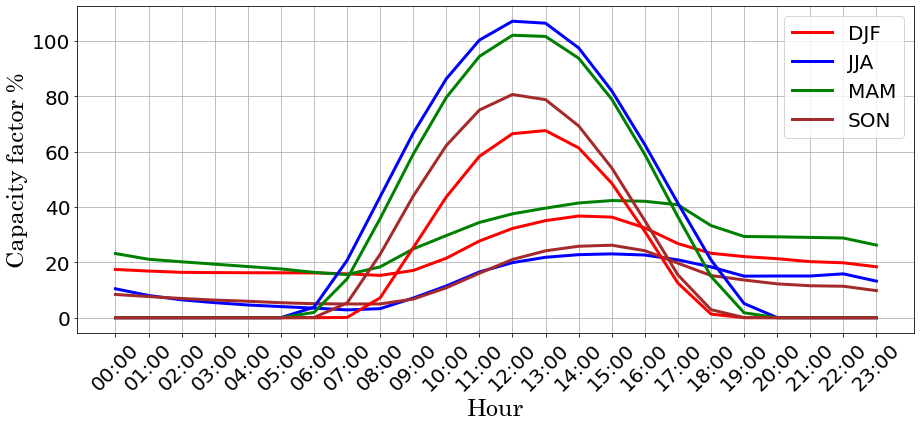

In [37]:
plt.figure(figsize = (15,6))

g = pd.date_range('1/1/2011', periods=24, freq='H')   #ceate one day time range
 
plt.plot(g.strftime("%H:00"), w_DJF_mean*2, label='DJF', color='red',  linewidth=3)
plt.plot(g.strftime("%H:00"), w_JJA_mean*2, label='JJA', color='blue',  linewidth=3)
plt.plot(g.strftime("%H:00"), w_MAM_mean*2, label='MAM', color='green',  linewidth=3)
plt.plot(g.strftime("%H:00"), w_SON_mean*2, label='SON',color='brown',  linewidth=3)

plt.plot(g.strftime("%H:00"), s_DJF_mean, color='red',  linewidth=3)
plt.plot(g.strftime("%H:00"), s_JJA_mean, color='blue',  linewidth=3)
plt.plot(g.strftime("%H:00"), s_MAM_mean, color='green',  linewidth=3)
plt.plot(g.strftime("%H:00"), s_SON_mean, color='brown',  linewidth=3)
plt.xticks(rotation=45);

#plt.plot(g.strftime("%H:00"), w_DJF_mean*15 + s_DJF_mean, color='red',  linewidth=3)
#plt.plot(g.strftime("%H:00"), w_JJA_mean*15 + s_JJA_mean, color='blue',  linewidth=3)
#plt.plot(g.strftime("%H:00"), w_MAM_mean*10 + s_MAM_mean, color='green',  linewidth=3)
#plt.plot(g.strftime("%H:00"), w_SON_mean*16 + s_SON_mean, color='brown',  linewidth=3)

#plt.fill_between(DJF_mean.index, DJF_mean - DJF_std, DJF_mean + DJF_std, label='standard deviation', color='red', alpha=0.05)
#plt.fill_between(JJA_mean.index, JJA_mean - JJA_std, DJF_mean + JJA_std, label='standard deviation', color='blue', alpha=0.05)
#plt.fill_between(MAM_mean.index, MAM_mean - DJF_std, MAM_mean + MAM_std, label='standard deviation', color='green', alpha=0.05)
#plt.fill_between(SON_mean.index, SON_mean - SON_std, DJF_mean + SON_std, label='standard deviation', color='yellow', alpha=0.05)
#plt.ylim(0, 12)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Hour',fontname='Century',fontsize=24, color='black')
plt.ylabel('Capacity factor %',fontname='Century', fontsize=24, color='black')
plt.legend(fontsize=20, loc='upper right')
#plt.xlim(0,23)
